In [2]:
import matplotlib.pyplot as plt  #파이썬 그래픽 패키지
import numpy as np               #배열 패키지   
import os
import tensorflow as tf
#from tensorflow.keras.models import load_model

print(tf.__version__)
tf.keras.datasets.mnist

2.9.1


<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Python3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
np.shape(x_train)

(60000, 28, 28)

In [5]:
np.shape(y_train)


(60000,)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

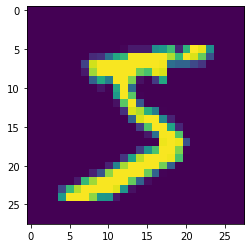

In [6]:
print(x_train[0])
plt.imshow(x_train[0])

### 데이터 전처리

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0   #Normalize

In [9]:
print(x_train[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

## 3. 모델 구성

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #2차원 배열을 1차원으로 바꿔주는 함수  입력 laysr
  tf.keras.layers.Dense(128, activation='relu'),  # hidden layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),  # hidden layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),  # hidden layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(16, activation='relu'),  # hidden layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax') # output layer
  
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
epochs = 10  # 학습 횟수


model.fit(x_train, y_train, epochs= epochs)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2829 - accuracy: 0.5084
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6546 - accuracy: 0.7970
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4718 - accuracy: 0.8708
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3908 - accuracy: 0.8972
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3437 - accuracy: 0.9098
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3157 - accuracy: 0.9166
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2907 - accuracy: 0.9233
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2715 - accuracy: 0.9284
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2547 - accuracy: 0.9319
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.248

In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1536 - accuracy: 0.9590 - 342ms/epoch - 1ms/step


In [15]:
model.save("MNIST_test1.h5")  

In [32]:
prediction = model.predict(x_test) 
print(prediction[prediction.argmax(1)==7])

313/313 [==============================] - 0s 811us/step
[[7.8501653e-19 9.9688978e-06 7.1751110e-06 ... 9.9975330e-01
  5.7447985e-10 1.7552868e-05]
 [2.0533269e-20 2.0622786e-06 6.0938373e-06 ... 9.9976784e-01
  3.0620308e-11 1.2061938e-06]
 [5.5407316e-16 4.4984219e-05 2.2382392e-05 ... 9.9908423e-01
  2.9022049e-08 3.2108466e-04]
 ...
 [8.5304797e-20 4.7063013e-06 2.0728503e-06 ... 9.9984932e-01
  3.1436498e-10 2.7073649e-05]
 [2.1860936e-17 3.5026431e-05 7.7516752e-06 ... 9.9952078e-01
  8.2640303e-09 2.2114556e-04]
 [3.9255733e-20 3.3814604e-06 5.7830416e-06 ... 9.9978203e-01
  8.9344129e-11 2.4483645e-06]]


1/1 [==============================] - 0s 17ms/step
predict :  [[3.5176931e-11 6.9876977e-19 1.1606389e-10 1.8385224e-06 2.3316836e-11
  2.1363478e-09 2.0455714e-12 9.9999654e-01 2.3780641e-13 1.6221113e-06]]
result number 7
result max 0.99999654
7


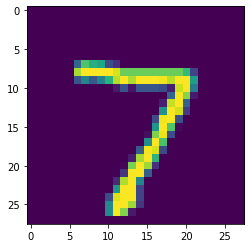

In [61]:
i= 0
X_DATA = x_test[i].reshape((1,28,28,1))
pred1 = model.predict(X_DATA)
print("predict : ",pred1)

print("result number", np.argmax(pred1) )
print("result max", np.max(pred1) )
print(y_test[i])
plt.imshow(x_test[i])


In [ ]:
a = model.layers[1]
a.weights